In [72]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics

from sklearn.model_selection import train_test_split

Computing the RMSE and R²-score

To overcome under-fitting, we need to increase the complexity of the model.

To convert the original features into their higher order terms we will use the __PolynomialFeatures__ class provided by scikit-learn. Next, we train the model using Linear Regression.

# Comparision plot

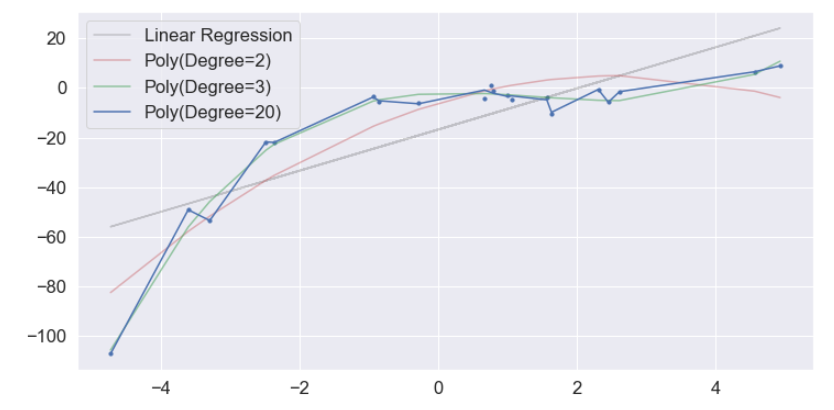

In [114]:
df = pd.read_csv('mt.csv')

In [115]:
df.shape

(32, 11)

In [116]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [76]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

## Need to predict mpg value of car

In [117]:
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']]
y = df[['mpg']]

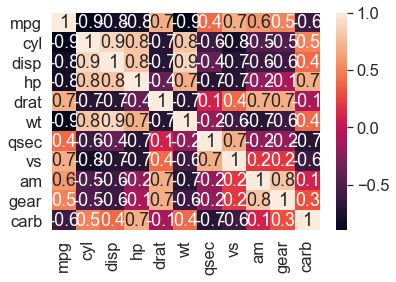

In [119]:
correlation_matrix = df.corr().round(1)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

In [79]:
correlation_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [120]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25, 10)
(7, 10)
(25, 1)
(7, 1)


In [81]:
X_train.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,4,79.0,66,4.08,1.935,18.90,1,1,4,1
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
28,8,351.0,264,4.22,3.170,14.50,0,1,5,4
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4


#### Training and testing the model

In [133]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Model evaluation

In [134]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
mse  = metrics.mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2   = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 3.434668072660387
RMSE is 1.8532857504066627
R2 score is 0.9082540723459335




In [135]:
print(lin_model.coef_)
print("------------------------------")
print(lin_model.intercept_)

[[-7.73742600e-01 -5.70020337e-04 -4.15490020e-03  5.14710336e-01
  -2.77657363e+00  4.57804913e-01  9.86421455e-01  1.64724997e+00
  -2.99722593e-01 -2.48486911e-01]]
------------------------------
[25.45534209]


In [136]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2   = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for testing set
--------------------------------------
RMSE is 3.4758552374213987


## LASSO : L1
 #### Feature Selection

In [137]:
from sklearn import linear_model
lin_lasso = linear_model.Lasso(alpha=1)
lin_lasso.fit(X_train, Y_train)

Lasso(alpha=1)

In [138]:
# model evaluation for training set
y_train_predict = lin_lasso.predict(X_train)
mse  = metrics.mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2   = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 6.456519534950746
RMSE is 2.540968227851491
R2 score is 0.8275351907027699




In [139]:
print(lin_lasso.coef_)
print("------------------------------")
print(lin_lasso.intercept_)

[-0.         -0.03515625 -0.01894504  0.         -0.          0.
  0.          0.          0.         -0.01801937]
------------------------------
[31.28630893]


In [140]:
# model evaluation for testing set
y_test_predict = lin_lasso.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2   = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 4.264790934440295


## RIDGE

In [141]:
from sklearn.linear_model import Ridge
lin_ridge = linear_model.Ridge(alpha= 0.1)
lin_ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [142]:
# model evaluation for training set
y_train_predict = lin_ridge.predict(X_train)
mse  = metrics.mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2   = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 3.4368639421700617
RMSE is 1.8538780817977383
R2 score is 0.9081954168715439




In [92]:
print(lin_ridge.coef_)
print("------------------------------")
print(lin_ridge.intercept_)

[[-7.74900632e-01 -1.83482234e-03 -3.60281568e-03  5.39400941e-01
  -2.63966550e+00  4.27953463e-01  9.37708781e-01  1.55448087e+00
  -2.46649055e-01 -2.95697698e-01]]
------------------------------
[25.67484511]


In [93]:
# model evaluation for testing set
y_test_predict = lin_ridge.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2   = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 3.493196112590397


## ElasticNet

In [94]:
from sklearn.linear_model import ElasticNet
lin_en = ElasticNet(random_state=0)
lin_en.fit(X_train, Y_train)

ElasticNet(random_state=0)

In [95]:
# model evaluation for training set
y_train_predict = lin_en.predict(X_train)
mse  = metrics.mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2   = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 5.709391355717574
RMSE is 2.3894332708233503
R2 score is 0.8474922772188906




In [96]:
print(lin_en.coef_)
print("------------------------------")
print(lin_en.intercept_)

[-0.14198449 -0.03620654 -0.00872563  0.         -0.          0.
  0.          0.          0.         -0.36612057]
------------------------------
[31.92444032]


In [97]:
# model evaluation for testing set
y_test_predict = lin_ridge.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2   = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 3.493196112590397


# Applying Polynomial Regression


- We will transform the original features into higher degree polynomials before training the model.

In [112]:
degree = 2

In [113]:
poly_features = PolynomialFeatures(degree=degree)

In [121]:
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

In [122]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression()

In [123]:
# predicting on training data-set
y_train_pred = poly_model.predict(X_train_poly)

In [124]:
# predicting on test data-set
y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

In [125]:
# evaluating the model on training dataset
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
r2_train   = metrics.r2_score(Y_train, y_train_pred)

In [126]:
# evaluating the model on test dataset
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
r2_test   = metrics.r2_score(Y_test, y_test_pred)

In [127]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.26469984369102e-12
R2 score of training set is 1.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.397432099197571
R2 score of test set is 0.27075819701879045


#### lets try a few degrees .. 3 to 20 and observe the RMSE and R2

- wrap the above in a function

In [128]:
def poly_function(degrees):
    
    degree_list      = []
    train_rmse_list  = []
    train_r2_list    = []
    test_rmse_list   = []
    test_r2_list     = []
    
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)

        # predicting on training data-set
        y_train_pred = poly_model.predict(X_train_poly)

        # predicting on test data-set
        y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

        # evaluating the model on training dataset
        rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
        r2_train   = metrics.r2_score(Y_train, y_train_pred)

        # evaluating the model on test dataset
        rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
        r2_test   = metrics.r2_score(Y_test, y_test_pred)
    
        degree_list.append(degree)
        train_rmse_list.append(rmse_train)
        train_r2_list.append(r2_train)
        test_rmse_list.append(rmse_test)
        test_r2_list.append(r2_test)
        
    return degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list
    

In [129]:
degree_list = np.arange(1, 10, 1)

degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list = poly_function(degree_list)

results= pd.DataFrame({'degrees':   np.array(degree_list), 
                       'train_mse': np.array(train_rmse_list),
                       'train_r2':  np.array(train_r2_list), 
                       'test_mse':  np.array(test_rmse_list),
                       'test_r2':   np.array(test_r2_list)
                      })

In [130]:
results

,degrees,train_mse,train_r2,test_mse,test_r2
0,1,1.853286e+00,0.908254,3.475855,0.544386
1,2,2.264700e-12,1.000000,4.397432,0.270758
2,3,5.612287e-13,1.000000,6.610377,-0.647881
3,4,1.118158e-11,1.000000,19.873907,-13.894975
4,5,6.098096e-11,1.000000,63.132348,-149.306291
5,6,3.987766e-10,1.000000,105.106094,-415.609403
6,7,2.717598e-09,1.000000,345.825066,-4509.100400
7,8,7.809997e-08,1.000000,1390.604983,-72924.738279
8,9,7.682923e-08,1.000000,3267.747051,-402688.341240


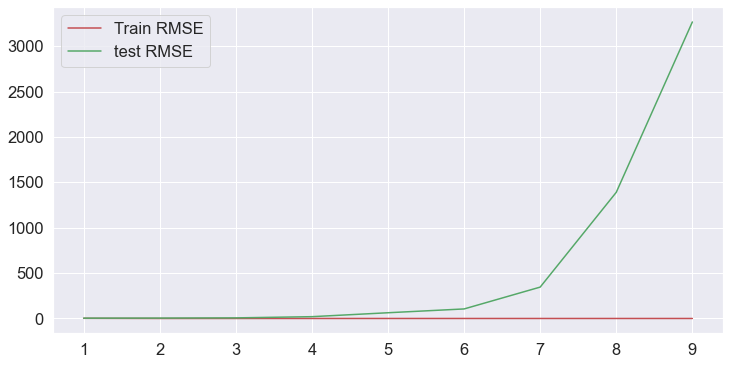

In [131]:
plt.figure(figsize=(12, 6))

# Train MSE
plt.plot(results.degrees, results.train_mse, color='r', label='Train RMSE', alpha=1)

# Test MSE
plt.plot(results.degrees, results.test_mse, color='g', label='test RMSE', alpha=1)

plt.legend();

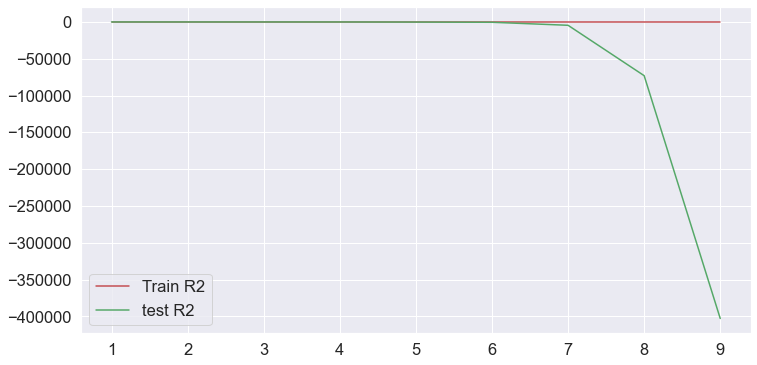

In [132]:
plt.figure(figsize=(12, 6))

# Train R2
plt.plot(results.degrees, results.train_r2, color='r', label='Train R2', alpha=1)

# Test R2
plt.plot(results.degrees, results.test_r2, color='g', label='test R2', alpha=1)

plt.legend();